In [ ]:
pip install visualkeras

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import keras
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
import visualkeras
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from itertools import product


images_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(images_classes)

In [ ]:
def plot_history(hst):
    plt.figure(figsize=(13,4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e,2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e,2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')
    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()

    plt.show()

In [ ]:
def plot_confusion_matrix(model, x_test, y_test, figsize, title, class_names):
    predicts = np.argmax(model.predict(x_test, verbose=0),axis=1)
    cm = confusion_matrix(y_test, predicts)

    plt.figure(figsize=(figsize,figsize))
    plt.imshow(cm,cmap=plt.cm.Greens)
    plt.title(title)
    plt.xticks(np.arange(len(class_names)), class_names, rotation=90)
    plt.yticks(np.arange(len(class_names)), class_names)

    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > 500 else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Dataset import, conversion and visualization

The CIFAR-10 dataset is one of seven datasets that can be downloaded directly from keras.

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

To build the model, we convert two-dimensional arrays of image types into one-dimensional arrays.

In [ ]:
y_train = y_train.ravel()
y_test = y_test.ravel()

 We check the dataset.

In [ ]:
print()
print(f'x_train Shape: {x_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print()
print(f'x_test Shape: {x_test.shape}')
print(f'y_test Shape: {y_test.shape}')


x_train Shape: (50000, 32, 32, 3)
y_train Shape: (50000,)

x_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000,)


 That's right: the images in the dataset are of shape (32,32,3), where (32,32) is the image resolution and 3 is the number of image channels (RGB: red, green and blue).
 We check the number of images of each class in the training and test dataset.

In [ ]:
print()
print(pd.DataFrame(y_train).value_counts())
print()
print(pd.DataFrame(y_test).value_counts())


0
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64

0
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64


 Everything is correct. The quantity corresponds to the declared quantity.

We normalize the data of the dataset. Now all the pixel values of the images are between 0 and 255. And we need values between 0 and 1 to build the model. To do this, we convert the data type to float and then divide all the pixel values by 255.0 .

In [ ]:
x_train = np.array(x_train, np.float32)
x_train = x_train / 255.

x_test = np.array(x_test, np.float32)
x_test = x_test / 255.

We visualize the dataset, that is, several images from the dataset.

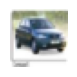

automobile




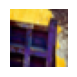

truck




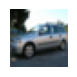

automobile




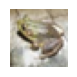

frog




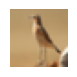

bird




In [ ]:
total_number_of_images = x_train.shape[0]
number_of_images = 5 # number of images to display

for i in range(number_of_images):
    nomer_of_image = randint(1, total_number_of_images)
    plt.figure(figsize=(.75, .75))
    plt.imshow(x_train[nomer_of_image])
    plt.axis('off')
    plt.show()

    print(images_classes[y_train[nomer_of_image]])
    print()
    print()

Classification using some standard sklearn classifiers

Let's try to make a classification model using some standard sklearn classifiers: SVC, DecisionTreeClassifier, ExtraTreeClassifier, RandomForestClassifier.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

start_time = datetime.now()
sv = SVC().fit(x_train_reshaped, y_train)
print(f"Validation accuracy for SVC: {sv.score(x_test_reshaped, y_test)}")
print(f'Calculation time: {datetime.now() - start_time}')
print()
print()

start_time = datetime.now()
dtc = DecisionTreeClassifier().fit(x_train_reshaped, y_train)
print(f"Validation accuracy for DecisionTreeClassifier: {dtc.score(x_test_reshaped, y_test)}")
print(f'Calculation time: {datetime.now() - start_time}')
print()
print()

start_time = datetime.now()
etc = ExtraTreeClassifier().fit(x_train_reshaped, y_train)
print(f"Validation accuracy for ExtraTreeClassifier: {etc.score(x_test_reshaped, y_test)}")
print(f'Calculation time: {datetime.now() - start_time}')
print()
print()

start_time = datetime.now()
rfc = RandomForestClassifier().fit(x_train_reshaped, y_train)
print(f"Validation accuracy for RandomForestClassifier: {rfc.score(x_test_reshaped, y_test)}")
print(f'Calculation time: {datetime.now() - start_time}')

The best result (validation accuracy: 54%) was given by the SVC classifier. A somewhat worse result (validation accuracy: 47%) was given by RandomForestClassifier. DecisionTreeClassifier and ExtraTreeClassifier gave quite poor results. The calculation time of the SVC classifier is 21 times greater than that of the RandomForestClassifier. In general, as we expected, these classifiers give unacceptable results for image classification.

Classification using simple neural networks

Let's try to build a model using a simple neural network.

In [ ]:
for i in [1, 5, 9]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
    for j in range(i, -1, -1):
        model.add(tf.keras.layers.Dense(units=16*(2**j), activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(units=10))


    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.015),
        metrics=['accuracy']
        )

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)

    history = model.fit(x_train, y_train, epochs=100, batch_size=1024, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Validation accuracy(model {i}):', test_acc)
    print()
    print()

In [ ]:
batch_list = [128, 256, 512, 1024, 2048, 4096]

steps = 10

for i in range(steps):
    number_in_layer = [randint(1,16)*64, randint(1,16)*64, randint(1,16)*64, randint(1,16)*64, randint(1,16)*64]
    drr = int(randint(5,10)*5)/100
    batch_ = random.choice(batch_list)
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(units=number_in_layer[0], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drr),
        tf.keras.layers.Dense(units=number_in_layer[1], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drr),
        tf.keras.layers.Dense(units=number_in_layer[2], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drr),
        tf.keras.layers.Dense(units=number_in_layer[3], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drr),
        tf.keras.layers.Dense(units=number_in_layer[4], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(drr),
        tf.keras.layers.Dense(units=10)
        ])

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.015),
        metrics=["accuracy"]
        )

    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=batch_, callbacks=[early_stopping, reduce_lr], verbose=0)
    st_numbers = f"1 layer - {number_in_layer[0]}, 2 layer - {number_in_layer[1]}, 3 layer - {number_in_layer[2]}, "
    st_numbers = f"{st_numbers}4 layer - {number_in_layer[3]}, 5 layer - {number_in_layer[4]}, dropout - {drr}, batch_size - {batch_}  "
    print(st_numbers)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Validation accuracy:', test_acc)
    print()

The best model, which used a simple neural network, gave a validation accuracy of 59%. One could continue to search for better neural network hyperparameters to improve the model. But we know that such a neural network is also suboptimal for image classification.

Classification using convolutional neural networks(CNN)

We build a model using a convolutional neural network.

Let's start with the simplest option.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)
plot_history(history)

loss, train_acc = model.evaluate(x_train, y_train)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)

The neural network with the addition of one convolutional layer increased the validation accuracy to 64%. This is an impressive result.

Let's improve the neural network. I'll add another convolutional layer and a maxpooling layer.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)
plot_history(history)

loss, train_acc = model.evaluate(x_train, y_train)
print('Accuracy:', train_acc)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)

 Validation accuracy increased to 75%.

Next, we will improve the neural network. Let's try a neural network with three convolutional layers and two maxpooling layers, and also add one dense layer.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.02),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)
plot_history(history)

loss, train_acc = model.evaluate(x_train, y_train)
print('Accuracy:', train_acc)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)

Validation accuracy increased to 82%.

 Let's try a neural network with six convolutional layers and three maxpooling layers. The convolutional part of the neural network conventionally consists of three parts. In each part, we have two convolution layers and one maxpooling layer. We will also increase the number of filters.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)
plot_history(history)

loss, train_acc = model.evaluate(x_train, y_train)
print('Accuracy:', train_acc)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)

Validation accuracy increased to almost 89%. This is a very good result.

We will select hyperparameters for such a neural network configuration. Let's start with the size of the kernel. For a kernel size of three, we already have the result. Let's check for the kernel size 4, 5, 6, 7.

In [ ]:
best_model = model
best_accuracy = test_acc

for kernel_size in range(4,8):
    print(f'kernel_size = {kernel_size}')
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kernel_size, input_shape=(32,32,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(10))

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
        metrics=["accuracy"]
    )

    history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

    loss, train_acc = model.evaluate(x_train, y_train)
    print()
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Validation accuracy:', test_acc)
    print()
    if best_accuracy < test_acc:
        best_accuracy = test_acc
        best_model = model

The best result was obtained for kernel size 3, although it turned out to be almost the same as for kernel size 4.

 Let's select the batch size.

In [ ]:
for batch_size in [128, 512, 1024, 4096]:
    print(f'batch_size = {batch_size}')
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(10))

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
        metrics=["accuracy"]
    )

    history = model.fit(x_train, y_train, epochs=100, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

    loss, train_acc = model.evaluate(x_train, y_train)
    print()
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Validation accuracy:', test_acc)
    print()
    if best_accuracy < test_acc:
        best_accuracy = test_acc
        best_model = model

The best result at batch_size = 256 .

Let's select the dropout value. First, let's try a sequential increase starting with 0.3.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.35))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.45))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

loss, train_acc = model.evaluate(x_train, y_train)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)
if best_accuracy < test_acc:
    best_accuracy = test_acc
    best_model = model

  Let's try a sequential increase starting from 0.1.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

loss, train_acc = model.evaluate(x_train, y_train)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)
if best_accuracy < test_acc:
    best_accuracy = test_acc
    best_model = model

Let's try the same dropout.

In [ ]:
for dropout_value in [0.1, 0.2, 0.4, 0.5]:
    print(f'dropout_value = {dropout_value}')
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(dropout_value))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(dropout_value))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(dropout_value))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_value))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout_value))
    model.add(tf.keras.layers.Dense(10))

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
        metrics=["accuracy"]
    )

    history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

    loss, train_acc = model.evaluate(x_train, y_train)
    print()
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Validation accuracy:', test_acc)
    print()
    if best_accuracy < test_acc:
        best_accuracy = test_acc
        best_model = model

The best result at dropout = 0.4 .

 Let's choose the best value for the learning rate.

In [ ]:
for learning_rate in [0.03, 0.02, 0.005, 0.0025]:
    print(f'learning_rate = {learning_rate}')
    if learning_rate > 0.01:
        factor_rate = 0.5
    else:
        factor_rate = 0.75
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(10))

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=factor_rate, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        metrics=["accuracy"]
    )

    history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

    loss, train_acc = model.evaluate(x_train, y_train)
    print()
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Validation accuracy:', test_acc)
    print()
    if best_accuracy < test_acc:
        best_accuracy = test_acc
        best_model = model

The best result at learning rate = 0.01 .

We will try to achieve a better result, we will try other configurations of the neural network. Now let's try a smaller number of filters.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

loss, train_acc = model.evaluate(x_train, y_train)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)
if best_accuracy < test_acc:
    best_accuracy = test_acc
    best_model = model

We have a lower validation accuracy of 1.5% with a much lighter model. Therefore, if the weight of the model is also important, then you can choose the configuration of the lighter model.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

loss, train_acc = model.evaluate(x_train, y_train)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)
if best_accuracy < test_acc:
    best_accuracy = test_acc
    best_model = model

 Here we have a validation accuracy of 89.3%(it's very close to the best right now). Let's try another neural network configuration.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

loss, train_acc = model.evaluate(x_train, y_train)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)
if best_accuracy < test_acc:
    best_accuracy = test_acc
    best_model = model

An attempt at such a neural network did not improve the result.

 Let's try a model with a lot of convolutional layers and a lot of filters in the last layers.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(32,32,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10))

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=0)

loss, train_acc = model.evaluate(x_train, y_train)
print()
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Validation accuracy:', test_acc)
if best_accuracy < test_acc:
    best_accuracy = test_acc
    best_model = model

This neural network configuration provided the model with the highest validation accuracy, but the model is very heavy.

 So, as a result of the selection of hyperparameters and configurations of the convolutional neural network, we obtained the highest validation accuracy of 90.3%. It may not be the best result, but the search process was long enough. And it is necessary to stop further searches.

Visualize the model.

In [ ]:
visualkeras.layered_view(best_model, legend=True)

In [ ]:
title_matrix = 'CIFAR-10 Image classification. Confusion Matrix (CNN)'
plot_confusion_matrix(best_model, x_test, y_test, 7, title_matrix, images_classes)

 As you can see, the model did the best in classifying images of automobiles, trucks, ships and frogs. The model classified images of cats, dogs and birds the worst. The model classified images of deers, airplanes and horses a little better. Most often, the model confuses the images of dogs and cats. Now we see where the model goes wrong.

    It may be necessary to use the data augmentation method for higher validation accuracy of the model. Other methods to improve the model are also possible.

    Thank you all for your attention to my work.